In [1]:
import ijson
import pandas as pd
import re
from konlpy.tag import Twitter

In [13]:
pos_tagger = Twitter()

def tokenize(doc):
    return['/'.join(t) for t in list(filter(lambda x: x[1] != 'Punctuation', pos_tagger.pos(doc, norm=True, stem=True))) ]


file_name = '/home/jhyoo/dev/res/namu.json'
df=pd.DataFrame(columns=['title', 'category', 'desc'])

with open(file_name) as file:
    parser = ijson.parse(file)
    
    cnt = 0
    for (prefix, event, value) in parser:
        #if(cnt>1000): break
        while((prefix, event) != ('item.title', 'string')):
            next(parser)
            (prefix, event, value) = next(parser)
        title = str(value)
        next(parser)
        (prefix, event, value) = next(parser)
        desc = str(value)
        cat_raw = re.findall('\[\[분류:모바일 게임\]\]', desc)
        cat = ''
        if (cat_raw):
            cat = cat_raw[0].replace('[[분류:','').replace(']]','')
            df.loc[len(df)] = [title, cat, tokenize(desc)]
        cnt += 1

StopIteration: 

In [18]:
df.to_json('/home/jhyoo/dev/res/mobile.json')

In [41]:
[ t for t in df.ix[236]['desc']]

['table/Alpha',
 'align/Alpha',
 'right/Alpha',
 '000000/Number',
 "'''{{/Foreign",
 '{#white/Hashtag',
 '창공/Noun',
 '의/Josa',
 '수호/Noun',
 '자/Suffix',
 '||||/Foreign',
 '<#fefefe/Hashtag',
 '파일/Noun',
 '창공/Noun',
 '의/Josa',
 '수호/Noun',
 '자/Suffix',
 'jpg/Alpha',
 'width/Alpha',
 '500/Number',
 '<#c0c0c0/Hashtag',
 '개발/Noun',
 '블루/Noun',
 '솜/Noun',
 '<#c0c0c0/Hashtag',
 '유통/Noun',
 '세시/Noun',
 '소프트/Noun',
 '<#c0c0c0/Hashtag',
 '플랫폼/Noun',
 '안드로이드/Noun',
 '운영체제/Noun',
 '안드로이드/Noun',
 '<#c0c0c0/Hashtag',
 '장르/Noun',
 'RPG/Alpha',
 'TCG/Alpha',
 '<#c0c0c0/Hashtag',
 '출시일/Noun',
 '2016/Number',
 '년/Noun',
 '3/Number',
 '월/Noun',
 '30/Number',
 '일/Noun',
 '<#c0c0c0/Hashtag',
 '장르/Noun',
 'RPG/Alpha',
 '<#c0c0c0/Hashtag',
 '공식/Noun',
 '홈/Noun',
 '||<:>[/Foreign',
 '[http://www.hungryapp.co.kr/bbs/list.php?bcode=changgong/URL',
 '헝그리앱/Noun',
 '목차/Noun',
 '개요/Noun',
 '스페이스/Noun',
 '오페라/Noun',
 'RPG/Alpha',
 '의/Noun',
 '등장/Noun',
 'br/Alpha',
 '특무팀/Noun',
 '엘즈/Noun',
 '의/Josa',
 '기다/Verb',
 '여행

In [47]:
print(df['title'])

0                      101-in-1 Games
1                       2010 프로야구(게임)
2                       2011 프로야구(게임)
3                       2012 프로야구(게임)
4                       2013 프로야구(게임)
5                          CSR racing
6                                Cogs
7                        DungeonDiary
8          GITADORA for iOS & Android
9                    Galaxy on Fire 2
10              Geometry Dash/스테이지 일람
11                  Hill Climb Racing
12                        Plague Inc.
13                            SCP-087
14                   SD건담 G제네레이션 프론티어
15                          TAP SONIC
16                   This War of Mine
17                            ToHeart
18                          Year Walk
19                                갓워즈
20                           건즈 앤 글로리
21                          걸 프렌드(베타)
22                                검은방
23                              게임발전국
24                             고스트 트릭
25                          괴리성 밀리언아서
26          

In [23]:
tokens = [token for (idx, doc) in df.iterrows() for token in doc['desc']]
print(len(tokens))

919092


In [24]:
import nltk
text = nltk.Text(tokens, name='Namu Mobile Game')
print(text)



<Text: Namu Mobile Game>


In [25]:
from pprint import pprint

pprint(text.vocab().most_common(10))


[('하다/Verb', 30425),
 ('을/Josa', 18146),
 ('이/Josa', 17273),
 ('의/Josa', 17096),
 ('에/Josa', 14207),
 ('가/Josa', 12522),
 ('있다/Adjective', 12481),
 ('를/Josa', 12146),
 ('되다/Verb', 9272),
 ('은/Josa', 8091)]


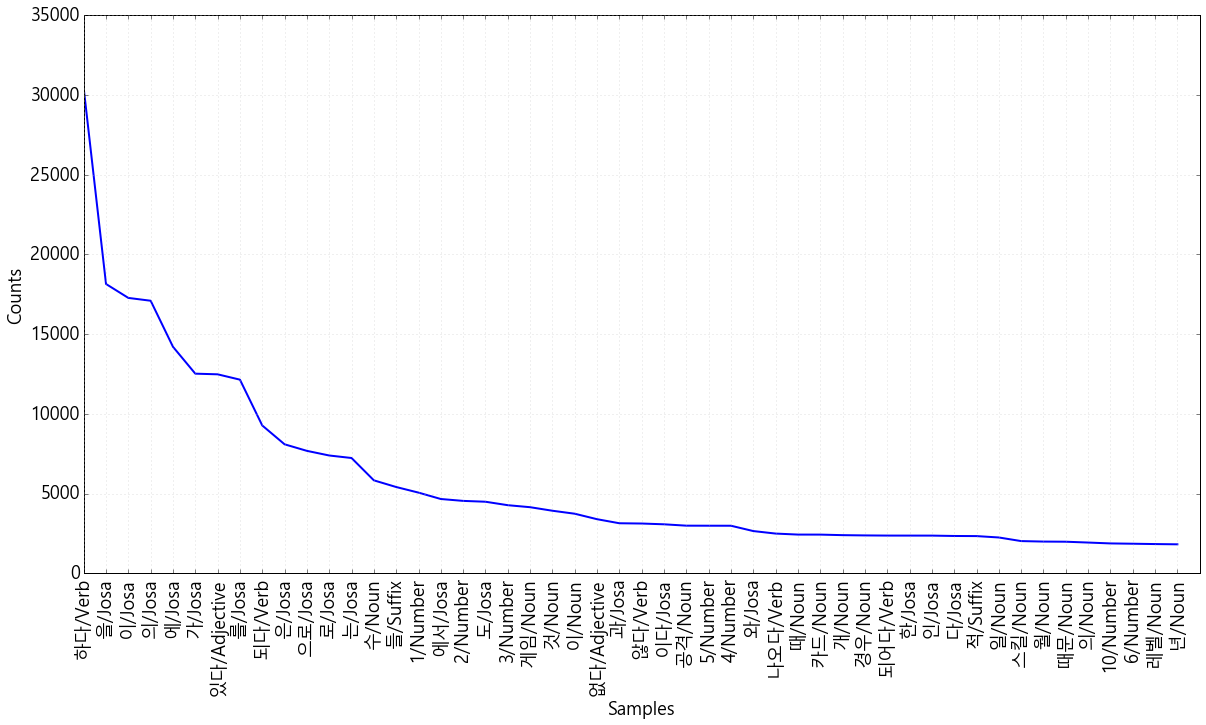

In [26]:
%matplotlib inline
from matplotlib import rc,rcParams

rc('font', family='Malgun Gothic', size=18)
rcParams['figure.figsize'] = (20.0, 10.0)
text.plot(50)

In [40]:
from gensim.models import doc2vec

games = [doc2vec.LabeledSentence(words=doc['desc'], tags=[doc['title']]) for (idx, doc) in df.iterrows()]

In [43]:
model = doc2vec.Doc2Vec(alpha=0.025, min_alpha=0.025)  # use fixed learning rate
model.build_vocab(games)
for epoch in range(10):
    model.train(games)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

In [44]:
model.docvecs.most_similar('클래시 로얄')

[('클래시 오브 클랜', 0.34339141845703125),
 ('스페셜솔져', 0.19181078672409058),
 ('붐비치', 0.17330047488212585),
 ('좀비 고등학교', 0.16101838648319244),
 ('디펜스 히어로', 0.15725009143352509),
 ('고양이의 세계', 0.14766500890254974),
 ('대해적 퀘스트 섬', 0.1469748467206955),
 ('그란트리아', 0.14350154995918274),
 ('101-in-1 Games', 0.14309751987457275),
 ('세계 정복자2/지휘관', 0.1430889070034027)]

In [45]:
model.docvecs.most_similar('붐비치')

[('건즈 앤 글로리', 0.2500128149986267),
 ('핵전쟁(모바일게임)', 0.2308284491300583),
 ('워스토리', 0.2251371294260025),
 ('세계 정복자2', 0.21677973866462708),
 ('모던 컴뱃 4', 0.2109515517950058),
 ('Hill Climb Racing', 0.20286861062049866),
 ('클래시 오브 클랜', 0.18925094604492188),
 ('세계 정복자2/전술카드', 0.17663723230361938),
 ('모던 컴뱃 2', 0.17429685592651367),
 ('클래시 로얄', 0.17330047488212585)]

In [48]:
model.docvecs.most_similar('길드 오브 아너')

[('영웅 for Kakao', 0.23770304024219513),
 ('헬로히어로', 0.22982925176620483),
 ('드래곤나이트(모바일 게임)', 0.21285183727741241),
 ('서머너즈 워 : 천공의 아레나', 0.19635146856307983),
 ('아이모', 0.19556047022342682),
 ('그랜드체이스M', 0.1886759251356125),
 ('파이널 판타지 6', 0.18668414652347565),
 ('드래곤 스트라이커', 0.18055374920368195),
 ('모바일 게임/목록/RPG', 0.18012318015098572),
 ('다크어벤저2', 0.17845158278942108)]

In [49]:
model.save('/home/jhyoo/dev/res/mobile.model')